In [42]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
import time
import gc
import lightgbm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [2]:
path = 'input/'
pd.set_option('display.max_columns', 500)

In [4]:
start_time = time.time()
df = pd.read_csv(path+"recien_horneado.csv",encoding='latin1',sep=';')
print(df.shape)
print("--- %s seconds ---" % (time.time() - start_time))
df.head()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,18,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(7168009, 93)
--- 120.69507551193237 seconds ---


,Id_HistoricoJob,Id_Job,Id_Malla,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Duracion,Promedio,Agente,Mxrc,Maxcmpc,Grupo,Force_Complete,CCF,Estado,Duracion_seg,Minutos_Scheduler-Inicio,flg_Mainframe,Grupo_Error,Dia_Semana_Scheduler,Dia_Semana_Inicio,Periodo_Dia_Scheduler,Periodo_Dia_Inicio,Dia_Semana_Scheduler__0,Dia_Semana_Scheduler__1,Dia_Semana_Scheduler__2,Dia_Semana_Scheduler__3,Dia_Semana_Scheduler__4,Dia_Semana_Scheduler__5,Dia_Semana_Scheduler__6,Dia_Semana_Inicio__0,Dia_Semana_Inicio__1,Dia_Semana_Inicio__2,Dia_Semana_Inicio__3,Dia_Semana_Inicio__4,Dia_Semana_Inicio__5,Dia_Semana_Inicio__6,Periodo_Dia_Scheduler__Madrugada,Periodo_Dia_Scheduler__Manhana,Periodo_Dia_Scheduler__Tarde,Periodo_Dia_Scheduler__Noche,Periodo_Dia_Inicio__Madrugada,Periodo_Dia_Inicio__Manhana,Periodo_Dia_Inicio__Tarde,Periodo_Dia_Inicio__Noche,Id_HistoricoJob_Previo,Frecuencia,Duracion_Acumulada,Id_Job_Previo,Id_Malla_Previo,Fecha_Carga_Scheduler_Previo,Fecha_Ejec_Inicio_Previo,Fecha_Ejec_Fin_Previo,Duracion_Previo,Promedio_Previo,Agente_Previo,Mxrc_Previo,Maxcmpc_Previo,Grupo_Previo,Force_Complete_Previo,CCF_Previo,Estado_Previo,Duracion_seg_Previo,Minutos_Scheduler-Inicio_Previo,flg_Mainframe_Previo,Grupo_Error_Previo,Dia_Semana_Scheduler_Previo,Dia_Semana_Inicio_Previo,Periodo_Dia_Scheduler_Previo,Periodo_Dia_Inicio_Previo,Dia_Semana_Scheduler__0_Previo,Dia_Semana_Scheduler__1_Previo,Dia_Semana_Scheduler__2_Previo,Dia_Semana_Scheduler__3_Previo,Dia_Semana_Scheduler__4_Previo,Dia_Semana_Scheduler__5_Previo,Dia_Semana_Scheduler__6_Previo,Dia_Semana_Inicio__0_Previo,Dia_Semana_Inicio__1_Previo,Dia_Semana_Inicio__2_Previo,Dia_Semana_Inicio__3_Previo,Dia_Semana_Inicio__4_Previo,Dia_Semana_Inicio__5_Previo,Dia_Semana_Inicio__6_Previo,Periodo_Dia_Scheduler__Madrugada_Previo,Periodo_Dia_Scheduler__Manhana_Previo,Periodo_Dia_Scheduler__Tarde_Previo,Periodo_Dia_Scheduler__Noche_Previo,Periodo_Dia_Inicio__Madrugada_Previo,Periodo_Dia_Inicio__Manhana_Previo,Periodo_Dia_Inicio__Tarde_Previo,Periodo_Dia_Inicio__Noche_Previo,Intervalo_Ultima_Ejec
0,559926,@DF2BYIX,02E2BXH9,2017-06-12 14:55:00,2017-06-12 22:04:07,2017-06-13 02:25:03,0 days 04:20:56.000000000,20053.666667,BFEFNFO,0.0,0,SCHE01,YES,NO,COMPLETE,15656,429,0,NaN,0,0,Tarde,Noche,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,606635.0,3.0,60161.0,@DF2BYIX,02E2BXH9,2017-06-09 14:55:00,2017-06-09 23:15:24,2017-06-10 05:15:16,0 days 05:59:52.000000000,NaN,BFEFNFO,0.0,0.0,SCHE01,YES,NO,COMPLETE,21592.0,500.0,0.0,NaN,4.0,4.0,Tarde,Noche,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1008.850000
1,559927,@DF2FCL2,02FBFCL4,2017-06-12 14:55:00,2017-06-13 04:34:18,2017-06-13 04:35:04,0 days 00:00:46.000000000,56.666667,PCLBE98,0.0,0,SCHE01,NO,NO,COMPLETE,46,819,0,NaN,0,1,Tarde,Madrugada,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,606636.0,3.0,170.0,@DF2FCL2,02FBFCL4,2017-06-09 14:55:00,2017-06-10 05:51:49,2017-06-10 05:52:58,0 days 00:01:09.000000000,1M00,PCLBE98,0.0,0.0,SCHE01,NO,NO,COMPLETE,69.0,896.0,0.0,NaN,4.0,5.0,Tarde,Madrugada,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1361.333333
2,559928,@DF2FCL4,02FBFCL2,2017-06-12 14:55:00,2017-06-13 04:34:18,2017-06-13 04:35:45,0 days 00:01:27.000000000,45.666667,PCLBE98,0.0,0,SCHE01,NO,NO,COMPLETE,87,819,0,NaN,0,1,Tarde,Madrugada,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,606637.0,3.0,137.0,@DF2FCL4,02FBFCL2,2017-06-09 14:55:00,2017-06-10 05:51:49,2017-06-10 05:52:23,0 days 00:00:34.000000000,1M00,PCLBE98,0.0,0.0,SCHE01,NO,NO,COMPLETE,34.0,896.0,0.0,NaN,4.0,5.0,Tarde,Madrugada,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1361.916667
3,559929,@DF2IACV,02FBFCL2,2017-06-12 14:55:00,2017-06-13 00:15:47,2017-06-13 00:15:49,0 days 00:00:02.000000000,1.000000,BFEFNFO,0.0,0,SCHE01,NO,NO,COMPLETE,2,560,0,NaN,0,1,Tarde,Madrugada,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,584064.0,4.0,4.0,@DF2IACV,02FBFCL2,2017-06-10 14:55:00,2017-06-

In [6]:
df['target']=1
df.loc[df['Mxrc']==0,'target']=0

In [84]:
df_val=df[df['Fecha_Ejec_Inicio']>='2018-01-01']
df=df[df['Fecha_Ejec_Inicio']<'2018-01-01']

In [85]:
df.columns

Index(['Id_HistoricoJob', 'Id_Job', 'Id_Malla', 'Fecha_Carga_Scheduler',
       'Fecha_Ejec_Inicio', 'Fecha_Ejec_Fin', 'Duracion', 'Promedio', 'Agente',
       'Mxrc', 'Maxcmpc', 'Grupo', 'Force_Complete', 'CCF', 'Estado',
       'Duracion_seg', 'Minutos_Scheduler-Inicio', 'flg_Mainframe',
       'Grupo_Error', 'Dia_Semana_Scheduler', 'Dia_Semana_Inicio',
       'Periodo_Dia_Scheduler', 'Periodo_Dia_Inicio',
       'Dia_Semana_Scheduler__0', 'Dia_Semana_Scheduler__1',
       'Dia_Semana_Scheduler__2', 'Dia_Semana_Scheduler__3',
       'Dia_Semana_Scheduler__4', 'Dia_Semana_Scheduler__5',
       'Dia_Semana_Scheduler__6', 'Dia_Semana_Inicio__0',
       'Dia_Semana_Inicio__1', 'Dia_Semana_Inicio__2', 'Dia_Semana_Inicio__3',
       'Dia_Semana_Inicio__4', 'Dia_Semana_Inicio__5', 'Dia_Semana_Inicio__6',
       'Periodo_Dia_Scheduler__Madrugada', 'Periodo_Dia_Scheduler__Manhana',
       'Periodo_Dia_Scheduler__Tarde', 'Periodo_Dia_Scheduler__Noche',
       'Periodo_Dia_Inicio__Madrugada', '

In [88]:
target=['target']

cols=['Promedio', 'Agente',
       #'Force_Complete', 'CCF', 'Estado',
      'Minutos_Scheduler-Inicio', 
      'flg_Mainframe',
       'Dia_Semana_Scheduler__0', 'Dia_Semana_Scheduler__1',
       'Dia_Semana_Scheduler__2', 'Dia_Semana_Scheduler__3',
       'Dia_Semana_Scheduler__4', 'Dia_Semana_Scheduler__5',
       'Dia_Semana_Scheduler__6', 'Dia_Semana_Inicio__0',
       'Dia_Semana_Inicio__1', 'Dia_Semana_Inicio__2', 'Dia_Semana_Inicio__3',
       'Dia_Semana_Inicio__4', 'Dia_Semana_Inicio__5', 'Dia_Semana_Inicio__6',
       'Periodo_Dia_Scheduler__Madrugada', 'Periodo_Dia_Scheduler__Manhana',
       'Periodo_Dia_Scheduler__Tarde', 'Periodo_Dia_Scheduler__Noche',
       'Periodo_Dia_Inicio__Madrugada', 'Periodo_Dia_Inicio__Manhana',
       'Periodo_Dia_Inicio__Tarde', 'Periodo_Dia_Inicio__Noche',
       'Frecuencia', 'Duracion_Acumulada',
       'Agente_Previo',
       'Grupo_Previo', 'Force_Complete_Previo', 'CCF_Previo', 'Estado_Previo',
       'Duracion_seg_Previo', 'Minutos_Scheduler-Inicio_Previo',
       'flg_Mainframe_Previo', 'Grupo_Error_Previo',
       'Dia_Semana_Scheduler__0_Previo', 'Dia_Semana_Scheduler__1_Previo',
       'Dia_Semana_Scheduler__2_Previo', 'Dia_Semana_Scheduler__3_Previo',
       'Dia_Semana_Scheduler__4_Previo', 'Dia_Semana_Scheduler__5_Previo',
       'Dia_Semana_Scheduler__6_Previo', 'Dia_Semana_Inicio__0_Previo',
       'Dia_Semana_Inicio__1_Previo', 'Dia_Semana_Inicio__2_Previo',
       'Dia_Semana_Inicio__3_Previo', 'Dia_Semana_Inicio__4_Previo',
       'Dia_Semana_Inicio__5_Previo', 'Dia_Semana_Inicio__6_Previo',
       'Periodo_Dia_Scheduler__Madrugada_Previo',
       'Periodo_Dia_Scheduler__Manhana_Previo',
       'Periodo_Dia_Scheduler__Tarde_Previo',
       'Periodo_Dia_Scheduler__Noche_Previo',
       'Periodo_Dia_Inicio__Madrugada_Previo',
       'Periodo_Dia_Inicio__Manhana_Previo',
       'Periodo_Dia_Inicio__Tarde_Previo', 'Periodo_Dia_Inicio__Noche_Previo',
       'Intervalo_Ultima_Ejec'] #TO DO

In [89]:
df['target'].value_counts()

0    4254056
1      38706
Name: target, dtype: int64

In [90]:
cont=0
index_cat=[]
cols_cat=[]
for i in cols:
    if df[i].dtype=='object':
        index_cat.append(cont)
        cols_cat.append(i)
    cont+=1
print(index_cat)
print(cols_cat)

[1, 28, 29, 30, 31, 32]
['Agente', 'Agente_Previo', 'Grupo_Previo', 'Force_Complete_Previo', 'CCF_Previo', 'Estado_Previo']


In [91]:
for i in cols_cat:
    cols.remove(i)
cols

['Promedio',
 'Minutos_Scheduler-Inicio',
 'flg_Mainframe',
 'Dia_Semana_Scheduler__0',
 'Dia_Semana_Scheduler__1',
 'Dia_Semana_Scheduler__2',
 'Dia_Semana_Scheduler__3',
 'Dia_Semana_Scheduler__4',
 'Dia_Semana_Scheduler__5',
 'Dia_Semana_Scheduler__6',
 'Dia_Semana_Inicio__0',
 'Dia_Semana_Inicio__1',
 'Dia_Semana_Inicio__2',
 'Dia_Semana_Inicio__3',
 'Dia_Semana_Inicio__4',
 'Dia_Semana_Inicio__5',
 'Dia_Semana_Inicio__6',
 'Periodo_Dia_Scheduler__Madrugada',
 'Periodo_Dia_Scheduler__Manhana',
 'Periodo_Dia_Scheduler__Tarde',
 'Periodo_Dia_Scheduler__Noche',
 'Periodo_Dia_Inicio__Madrugada',
 'Periodo_Dia_Inicio__Manhana',
 'Periodo_Dia_Inicio__Tarde',
 'Periodo_Dia_Inicio__Noche',
 'Frecuencia',
 'Duracion_Acumulada',
 'Duracion_seg_Previo',
 'Minutos_Scheduler-Inicio_Previo',
 'flg_Mainframe_Previo',
 'Grupo_Error_Previo',
 'Dia_Semana_Scheduler__0_Previo',
 'Dia_Semana_Scheduler__1_Previo',
 'Dia_Semana_Scheduler__2_Previo',
 'Dia_Semana_Scheduler__3_Previo',
 'Dia_Semana_Schedu

In [29]:
# from sklearn import preprocessing
# def encode_features(df_titanicdata,features):
    
#     for feature in features:
#         le = preprocessing.LabelEncoder()
#         le = le.fit(df_titanicdata[feature])
#         df_titanicdata[feature] = le.transform(df_titanicdata[feature])

#     return df_titanicdata
    
# df = encode_features(data_train,cols_cat)
# df.head()


NameError: name 'data_train' is not defined

In [92]:
y=np.array(df[target]).ravel()
X=np.array(df[cols])
X

array([[2.00536667e+04, 4.29000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00885000e+03],
       [5.66666667e+01, 8.19000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.36133333e+03],
       [4.56666667e+01, 8.19000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.36191667e+03],
       ...,
       [1.08869048e+01, 5.52000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.43788333e+03],
       [1.01190476e+00, 5.31000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 6.66666667e-02],
       [1.00000000e+00, 5.51000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.43825000e+03]])

In [93]:
#del(df)
gc.collect()

88

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [95]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 2
}

In [96]:
lgb_train = lightgbm.Dataset(X_train, y_train)
lgb_test = lightgbm.Dataset(X_test, y_test, reference=lgb_train)

In [119]:
lgbm = lightgbm.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                      feature_name =cols,
                verbose_eval=2)

[2]	training's auc: 0.998596	valid_1's auc: 0.998559
[4]	training's auc: 0.998633	valid_1's auc: 0.998593
[6]	training's auc: 0.998654	valid_1's auc: 0.998615
[8]	training's auc: 0.998662	valid_1's auc: 0.99862
[10]	training's auc: 0.998664	valid_1's auc: 0.998623
[12]	training's auc: 0.998674	valid_1's auc: 0.998633
[14]	training's auc: 0.998676	valid_1's auc: 0.998637
[16]	training's auc: 0.998687	valid_1's auc: 0.998648
[18]	training's auc: 0.998694	valid_1's auc: 0.998655
[20]	training's auc: 0.9987	valid_1's auc: 0.99866
[22]	training's auc: 0.998706	valid_1's auc: 0.998665
[24]	training's auc: 0.998714	valid_1's auc: 0.998672
[26]	training's auc: 0.998718	valid_1's auc: 0.998674
[28]	training's auc: 0.998721	valid_1's auc: 0.998677
[30]	training's auc: 0.998725	valid_1's auc: 0.998681
[32]	training's auc: 0.99873	valid_1's auc: 0.998688
[34]	training's auc: 0.998736	valid_1's auc: 0.998694
[36]	training's auc: 0.99875	valid_1's auc: 0.998707
[38]	training's auc: 0.998757	valid_1'

In [120]:
y_predict_lgbm=lgbm.predict(np.array(df_val[cols]))
y_val_true=np.array(df_val[target]).ravel()

In [121]:
thresh=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for t in thresh:
    y_t=[(1 if y_predict_lgbm[i]>t else 0) for i in range(len(y_predict_lgbm))]
    print(t,accuracy_score(y_val_true, y_t),recall_score(y_val_true, y_t),precision_score(y_val_true, y_t),roc_auc_score(y_val_true, y_t))

0 0.009503879144991718 1.0 0.009503879144991718 0.5
0.1 0.9975942936380771 0.9990485252140818 0.7984557339650785 0.9983144326995399
0.2 0.9971512012707082 0.9394715655419746 0.7970443043869726 0.9685881034638718
0.3 0.9967943623626074 0.8694283832247677 0.8079028802666032 0.9337224155062347
0.4 0.9965408189279042 0.8181951255214813 0.8178958150424349 0.9082235918886554
0.5 0.9963968312983198 0.7701090536485399 0.8376721598598837 0.8843385659531643
0.6 0.9958633119172022 0.6639098294664422 0.8700364473431805 0.8314791290636045
0.7 0.9953711802846851 0.581973212325258 0.893979425487661 0.7906554874272427
0.8 0.9948039246715151 0.48034838615238235 0.94663204961777 0.7400442737420524
0.9 0.9925255117212538 0.2194979140745078 0.9735432559649407 0.6097203396704097


In [123]:
s=pd.DataFrame(y_predict_lgbm)
a=pd.DataFrame(y_val_true)
s=s.merge(a,how='left',right_index=True,left_index=True)
s[s['0_x']>0.6]

,0_x,0_y
133,0.633286,1
428,0.616568,1
1007,0.613752,1
2591,0.637238,1
3386,0.733802,1
3387,0.733802,1
3388,0.733802,1
3591,0.661226,1
3592,0.733802,1
3597,0.712403,1


In [107]:
df_val['prob']=pd.Series(y_predict_lgbm)
df_val

,Id_HistoricoJob,Id_Job,Id_Malla,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Duracion,Promedio,Agente,Mxrc,Maxcmpc,Grupo,Force_Complete,CCF,Estado,Duracion_seg,Minutos_Scheduler-Inicio,flg_Mainframe,Grupo_Error,Dia_Semana_Scheduler,Dia_Semana_Inicio,Periodo_Dia_Scheduler,Periodo_Dia_Inicio,Dia_Semana_Scheduler__0,Dia_Semana_Scheduler__1,Dia_Semana_Scheduler__2,Dia_Semana_Scheduler__3,Dia_Semana_Scheduler__4,Dia_Semana_Scheduler__5,Dia_Semana_Scheduler__6,Dia_Semana_Inicio__0,Dia_Semana_Inicio__1,Dia_Semana_Inicio__2,Dia_Semana_Inicio__3,Dia_Semana_Inicio__4,Dia_Semana_Inicio__5,Dia_Semana_Inicio__6,Periodo_Dia_Scheduler__Madrugada,Periodo_Dia_Scheduler__Manhana,Periodo_Dia_Scheduler__Tarde,Periodo_Dia_Scheduler__Noche,Periodo_Dia_Inicio__Madrugada,Periodo_Dia_Inicio__Manhana,Periodo_Dia_Inicio__Tarde,Periodo_Dia_Inicio__Noche,Id_HistoricoJob_Previo,Frecuencia,Duracion_Acumulada,Id_Job_Previo,Id_Malla_Previo,Fecha_Carga_Scheduler_Previo,Fecha_Ejec_Inicio_Previo,Fecha_Ejec_Fin_Previo,Duracion_Previo,Promedio_Previo,Agente_Previo,Mxrc_Previo,Maxcmpc_Previo,Grupo_Previo,Force_Complete_Previo,CCF_Previo,Estado_Previo,Duracion_seg_Previo,Minutos_Scheduler-Inicio_Previo,flg_Mainframe_Previo,Grupo_Error_Previo,Dia_Semana_Scheduler_Previo,Dia_Semana_Inicio_Previo,Periodo_Dia_Scheduler_Previo,Periodo_Dia_Inicio_Previo,Dia_Semana_Scheduler__0_Previo,Dia_Semana_Scheduler__1_Previo,Dia_Semana_Scheduler__2_Previo,Dia_Semana_Scheduler__3_Previo,Dia_Semana_Scheduler__4_Previo,Dia_Semana_Scheduler__5_Previo,Dia_Semana_Scheduler__6_Previo,Dia_Semana_Inicio__0_Previo,Dia_Semana_Inicio__1_Previo,Dia_Semana_Inicio__2_Previo,Dia_Semana_Inicio__3_Previo,Dia_Semana_Inicio__4_Previo,Dia_Semana_Inicio__5_Previo,Dia_Semana_Inicio__6_Previo,Periodo_Dia_Scheduler__Madrugada_Previo,Periodo_Dia_Scheduler__Manhana_Previo,Periodo_Dia_Scheduler__Tarde_Previo,Periodo_Dia_Scheduler__Noche_Previo,Periodo_Dia_Inicio__Madrugada_Previo,Periodo_Dia_Inicio__Manhana_Previo,Periodo_Dia_Inicio__Tarde_Previo,Periodo_Dia_Inicio__Noche_Previo,Intervalo_Ultima_Ejec,target,prob
4253726,4834120,@DF2EA92,02EMAH92,2017-12-31 14:55:00,2018-01-01 00:30:00,2018-01-01 00:30:16,0 days 00:00:16.000000000,20.402913,PTBNBQX3E96,0.0,0,SCHE01,NO,NO,COMPLETE,16,575,0,NaN,6,0,Tarde,Madrugada,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,4848537.0,206.0,4203.0,@DF2EA92,02EMAH92,2017-12-30 14:55:00,2017-12-31 00:30:00,2017-12-31 00:30:20,0 days 00:00:20.000000000,1M00,PTBNBQX3E96,0.0,0.0,SCHE01,NO,NO,COMPLETE,20.0,575.0,0.0,NaN,5.0,6.0,Tarde,Madrugada,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1439.666667,0,NaN
4253727,4834121,@DF2LIAB,00FBFCL2,2017-12-30 14:55:00,2018-01-01 00:54:40,2018-01-01 00:54:51,0 days 00:00:11.000000000,9.280702,BFEFNFO,0.0,0,SCHE01,NO,NO,COMPLETE,11,599,0,NaN,5,0,Tarde,Madrugada,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,4856270.0,171.0,1587.0,@DF2LIAB,00FBFCL2,2017-12-29 14:55:00,2017-12-30 01:23:03,2017-12-30 01:23:14,0 days 00:00:11.000000000,1M00,BFEFNFO,0.0,0.0,SCHE01,NO,NO,COMPLETE,11.0,628.0,0.0,NaN,4.0,5.0,Tarde,Madrugada,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1411.433333,0,NaN
4253729,4834123,@DF2NO92,02FMIH92,2018-01-01 14:55:00,2018-01-01 15:10:00,2018-01-01 15:10:00,0 days 00:00:00.000000000,1.014528,PLCHLIM,0.0,0,SCHE01,NO,NO,COMPLETE,1,15,0,NaN,0,0,Tarde,Tarde,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4848538.0,413.0,419.0,@DF2NO92,02FMIH92,2017-12-31 14:55:00,2017-12-31 15:10:00,2017-12-31 15:10:00,0 days 00:00:00.000000000,NaN,PLCHLIM,0.0,0.0,SCHE01,NO,NO,COMPLETE,1.0,15.0,0.0,NaN,6.0,6.0,Tarde,Tarde,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0,NaN
4253731,4834125,@E2BH919,02BH1HH2,2017-12-31 14:55:00,2018-01-01 03:00:00,2018-01-01 03:00:42,0 days 00:00:42.000000000,83.740933,PDLUE96,0.0,0,SCHE01,NO,NO,COMPLETE,42,725,0,NaN,6,0,Tarde,Madrugada,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,484854

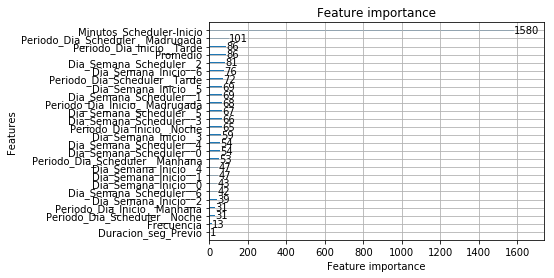

In [122]:
import matplotlib.pyplot as plt
lightgbm.plot_importance(lgbm)
plt.show()

In [125]:
from sklearn.externals import joblib
joblib.dump(lgbm, 'output/'+'modelo_errores.brain') 

['output/modelo_errores.brain']